# CropWise - Crop Prediction Application

In [1]:
import numpy as np
import pandas as pd

Download the .csv file and upload it in the console's Files.

In [3]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
y = crop["label"]
y

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [6]:
X = crop.drop(["label"], axis=1)
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


<Axes: >

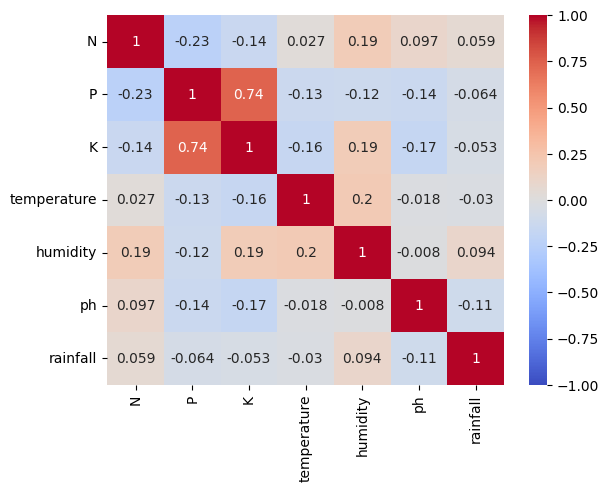

In [7]:
corr = X.corr()

import seaborn as sns
sns.heatmap(corr.round(3), annot=True, cbar=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

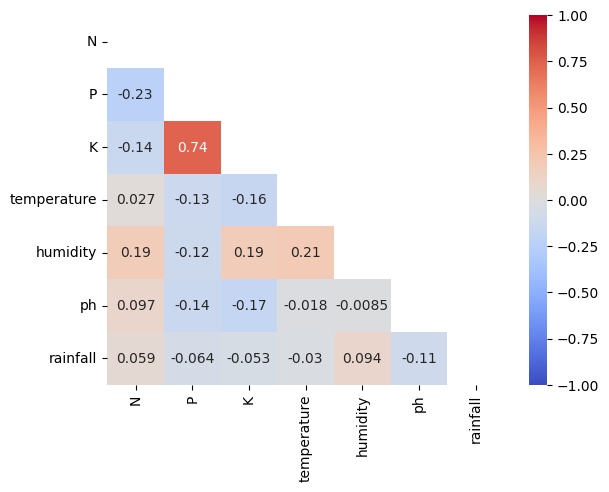

In [9]:
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask= mask)

Dropping column "P" because "P" and "K" are correlated.

In [10]:
X = crop.drop(["label", "P"], axis=1)
X

,N,K,temperature,humidity,ph,rainfall
0,90,43,20.879744,82.002744,6.502985,202.935536
1,85,41,21.770462,80.319644,7.038096,226.655537
2,60,44,23.004459,82.320763,7.840207,263.964248
3,74,40,26.491096,80.158363,6.980401,242.864034
4,78,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...
2195,107,32,26.774637,66.413269,6.780064,177.774507
2196,99,27,27.417112,56.636362,6.086922,127.924610
2197,118,30,24.131797,67.225123,6.362608,173.322839
2198,117,34,26.272418,52.127394,6.758793,127.175293


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# scale the features using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

X_train = minmaxscaler.fit_transform(X_train)
X_test = minmaxscaler.transform(X_test)

In [13]:
# standardization using standardscalar
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training and packing the models.

In [14]:
# training models
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    # print(f"{name}\n\n{classification_report(y_test, ypred)}")
    print(name)
    print(classification_report(y_test, ypred))
    print(confusion_matrix(y_test, ypred))
    with open(str(model)+'.pkl', 'wb') as f:
      pickle.dump(model, f)

Logistic Regression
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       0.94      0.94      0.94        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.91      0.86        23
 kidneybeans       0.95      0.90      0.92        20
      lentil       0.67      0.91      0.77        11
       maize       1.00      0.95      0.98        21
       mango       0.76      1.00      0.86        19
   mothbeans       0.89      0.67      0.76        24
    mungbean       0.90      1.00      0.95        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      p

In [15]:
# ensemble learning

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}


for name, model in ensemble_models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")
    with open(str(model)+'.pkl', 'wb') as f:
      pickle.dump(model, f)

Random Forest  with accuracy : 0.9863636363636363
Bagging  with accuracy : 0.9795454545454545
AdaBoost  with accuracy : 0.17727272727272728
Gradient Boosting  with accuracy : 0.975


In [16]:
# the model used for predictions is random forest classifier

forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
# function that uses the random forest classifier and returns the predicted value
def recommendation(N,K,temperature,humidity,ph,rainfal):
    features = np.array([[N,K,temperature,humidity,ph,rainfal]])
    transformed_features = minmaxscaler.fit_transform(features)
    transformed_features = scaler.fit_transform(transformed_features)
    prediction = forest.predict(transformed_features).reshape(1,-1)

    return prediction[0]

In [ ]:
# input data
N = 90
K = 45
temperature = 30.0
humidity = 70
ph = 7
rainfall = 200

# predicted crop
predict = recommendation(N,K,temperature,humidity,ph,rainfall)

recommended_crop = predict[0]
print("{} is a best crop to be cultivated ".format(recommended_crop))

mango is a best crop to be cultivated 
